In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#we have data of:
# -Deaths
# -Confirmed
# -Oficial Infected
# 
# Real Infected = Official Infected * 1/prob(prob_going_hospital)
# 
# Confirmed = Official Infected + Recovered + Death
# Oficial Recovered = Confirmed - Infected - Deaths
# Subsceptible = N - Real Infected - Recovery - Death

In [3]:
#probability to go to the hospital and make the test in the initial dates in Spain
prob_going_hospital = 0.05 #segun Timothy Russell

In [5]:
df_confirmed = pd.read_csv('database/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('database/time_series_covid19_deaths_global.csv')

# Calculating TR before quarantine in Spain, trmax

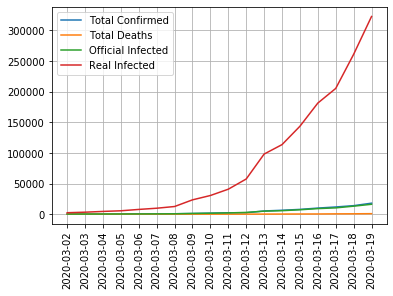

In [7]:
#Data from 2 MAR a 19 MAR, donde se puede apreciar los efectos precuarentena
start = pd.Timestamp('2020-03-02')
end = pd.Timestamp('2020-03-19')
t = np.linspace(start.value, end.value, 18)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Spain'

cases_confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns.values[4:]].values.reshape(-1)[40:58]
deaths_confirmed = df_death[df_death['Country/Region'] == country][df_death.columns.values[4:]].values.reshape(-1)[40:58]
official_infected_confirmed_by_date = np.array([118,162,224,276,387,485,625,1169,1524,2039,2871,4906,5678,
                                       7177,9070,10265,13050,16139])
real_infected = official_infected_confirmed_by_date / prob_going_hospital

plt.plot(t,cases_confirmed,label='Total Confirmed')
plt.plot(t,deaths_confirmed,label='Total Deaths')
plt.plot(t,official_infected_confirmed_by_date,label='Official Infected')
plt.plot(t,real_infected,label='Real Infected')


plt.xticks(t, t, rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [8]:
#considero que recover = deaths_confirmed para estos dias de analisis
N = 46700000 #poblacion Espana

subsceptible = (N - real_infected - deaths_confirmed*2) / N #in percent
real_infecteds = real_infected / N

In [10]:
def get_tr(dS,I,S):
    """
    from SIR model, ds/dt = - tr * I * S
    tr = -(dS/dt) / (I*S)
    """
    return -ds/(I*S)

tr_vector = []
for i in range(len(subsceptible)-1):
    ds = subsceptible[i+1]-subsceptible[i]
    tr = get_tr(ds, real_infecteds[i], subsceptible[i])
    tr_vector.append(tr)

In [11]:
np.mean(tr_vector)

0.34779200671020105

In [88]:
tr = 0.3478 # trmax before quarantine in Spain

# Calculating TR in quarantine Italy, trmin

No tenemos datos de la cuarentena en Espana aun, asi que usamos la de Italia considerando que son primo hermanos.
Italia lleva varias semanas haciendo cuarentena severa, asi que cojemos los ultimos 6 dias para estimar el valor de tr.

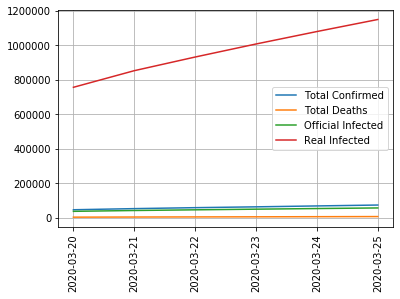

In [13]:
#Data from 20 MAR a 25 MAR, donde se puede apreciar los efectos cuarentena en Italia
start = pd.Timestamp('2020-03-20')
end = pd.Timestamp('2020-03-25')
t = np.linspace(start.value, end.value, 6)
t = pd.to_datetime(t).date
t = np.asarray(t)

country = 'Italy'

cases_confirmed = df_confirmed[df_confirmed['Country/Region'] == country][df_confirmed.columns.values[62:]].values.reshape(-1)
deaths_confirmed = df_death[df_death['Country/Region'] == country][df_death.columns.values[62:]].values.reshape(-1)
official_infected_confirmed_by_date = np.array([37860,42681,46638,50418,54030,57521])
real_infected = official_infected_confirmed_by_date / prob_going_hospital

plt.plot(t,cases_confirmed,label='Total Confirmed')
plt.plot(t,deaths_confirmed,label='Total Deaths')
plt.plot(t,official_infected_confirmed_by_date,label='Official Infected')
plt.plot(t,real_infected,label='Real Infected')

plt.xticks(t, t, rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [14]:
#considero que recover = deaths_confirmed para estos dias de analisis
N = 60480000 #poblacion Italia

subsceptible = (N - real_infected - deaths_confirmed*2) / N #in percent
real_infecteds = real_infected / N

In [15]:
tr_vector = []
for i in range(len(subsceptible)-1):
    ds = subsceptible[i+1]-subsceptible[i]
    tr = get_tr(ds, real_infecteds[i], subsceptible[i])
    tr_vector.append(tr)

In [16]:
np.mean(tr_vector)

0.09035902944068198

In [ ]:
tr = 0.0904 # trmin, quarantine in Italy